# pyplotlib 관련 학습 내용 정리




### Jupyter Notebook에서 FuncAnimation이 동작하지 않는 이유

#### GPT 답변
- VS Code의 Jupyter 확장에서 matplotlib는 기본적으로 "inline" 모드(%matplotlib inline)로 실행됩니다.
- 이는 정적인 이미지로 플롯을 렌더링하기 때문에, FuncAnimation처럼 계속 업데이트되는 애니메이션을 제대로 표시하지 못하는 문제가 발생합니다.

- 즉, plt.show()는 일반적인 Python 스크립트(.py 파일)에서는 문제없이 동작하지만,<br>
Jupyter Notebook(.ipynb)에서는 별도로 인터랙티브 모드를 활성화해야 애니메이션이 보입니다.

#### 대책
- 인터렉티브 모드가 잘 지원되는 백엔드로 변경.
  - `%matplotlib qt`
  - 실행하면 별도의 창이 열리면서 애니메이션이 정상적으로 표시됩니다.
  - 단, macOS에서 qt 백엔드가 없을 수도 있으니, pip install pyqt6을 설치해야 할 수도 있습니다.
  - ==> 일단 이건 보류함.

- to_jshtml()을 사용 (Jupyter 내부에서 실행 가능)
  - 만약 별도의 창을 띄우지 않고 Jupyter 내부에서 실행하고 싶다면, HTML(ani.to_jshtml())을 사용할 수도 있습니다.
  - from IPython.display import HTML
  - ...
  - HTML(ani.to_jshtml())

### gemini 답변

- 원인: VS Code의 주피터 노트북 환경에서 Matplotlib 애니메이션을 표시하기 위한 적절한 백엔드가 설정되지 않았을 수 있습니다. %matplotlib inline은 정적인 플롯을 노트북 셀 내에 표시하는 데 사용되며, 애니메이션에는 적합하지 않습니다.
- ipympl 백엔드 사용: ipympl은 Matplotlib의 대화형 백엔드입니다. 먼저 ipympl을 설치해야 합니다. 터미널이나 VS Code 터미널에서 가상 환경("ml_39")이 활성화된 상태로 다음 명령어를 실행하세요.
  - `pip install ipympl`
- 설치 후에는 주피터 노트북에서 다음 명령어를 실행하여 백엔드를 활성화합니다.
  - `%matplotlib widget`

### %matplotlib inline의 한계:
- %matplotlib inline은 정적 이미지를 출력하도록 설계되었습니다. 즉, 애니메이션과 같은 동적 콘텐츠를 렌더링하는 데 적합하지 않습니다.
  - VSCode의 Jupyter 환경에서 `%matplotlib inline`을 사용하면 FuncAnimation이 제대로 동작하지 않고 빈 figure만 표시될 가능성이 높습니다.
- VSCode와 Jupyter의 렌더링 방식:
  - VSCode의 Jupyter 확장은 IPython 디스플레이 시스템을 사용하지만, 애니메이션은 HTML5 비디오나 JavaScript 기반 렌더링을 필요로 합니다. 이를 위해 적절한 백엔드가 설정되어야 합니다.
- 환경 설정 문제:
  - miniforge 가상환경(ml_39)에서 Matplotlib의 기본 백엔드가 애니메이션을 지원하지 않을 수 있습니다.
  - 예를 들어, 백엔드가 `agg`(비대화형)로 설정되어 있다면 애니메이션이 동작하지 않습니다.



#### matplotlib notebook 지정 시에도 아무런 화면 안나옴.
- matplotlib.get_backend() 의 결과가 'nbAgg' 임. 
- 앞 설명에서 `agg`가 비대화형이라고 하니 이 `nbAgg` 역시 비대화형일 가능성 높음. 
- 백엔드를 교체해 볼 필요가 있겠음.

In [ ]:
import matplotlib
matplotlib.get_backend()
# 'module://matplotlib_inline.backend_inline'

'module://matplotlib_inline.backend_inline'

### grok3 답변

- 조치
  - 주의: %matplotlib notebook은 VSCode에서 항상 완벽히 지원되지 않을 수 있습니다. 동작하지 않으면 다음 방법으로 넘어갑니다.

```python
from IPython.display import HTML
...
# 맨 아래에..
HTML(ani.to_jshtml())
```

- 설명
  - ani.to_jshtml()은 애니메이션을 JavaScript 기반 HTML로 변환하며, VSCode의 Jupyter 셀 출력에서 잘 동작합니다.
  - `%matplotlib inline`은 제거하거나 유지해도 무방합니다.

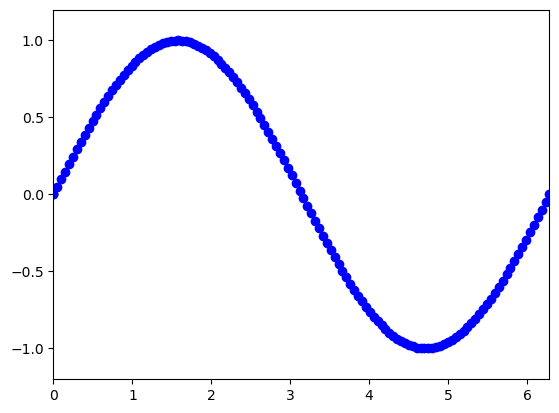

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# %matplotlib inline # inline 은 애니메이션을 지원하지 않을 가능성이 높다고 함.
# %matplotlib notebook

# matplotlib.use("TkAgg")
# If the new backend is different than the current backend then
#   all open Figures will be closed via plt.close('all').
# plt.switch_backend("TkAgg")

fig, ax = plt.subplots()
ax.set_xlim(0, 2*np.pi)
ax.set_ylim(-1.2, 1.2)

x, y = [], []
line, = plt.plot([], [], 'bo')
# line, = ax.plot([], [], 'bo')

def update(frame):
    x.append(frame)
    y.append(np.sin(frame))
    line.set_data(x, y)
    return line,

ani = FuncAnimation(fig, update, frames=np.linspace(0, 2*np.pi, 128))
# plt.show()
HTML(ani.to_jshtml())
